In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from astropy.table import Table
from astropy.wcs import WCS

from astropy.io import fits
from astropy.table import Table
from astropy.io import ascii

In [2]:
homedir = os.getenv("HOME")
tab = ascii.read(homedir+"/github/WISE_test/testest2_plots.txt")
tab

xc,xc_err,yc,yc_err,mag,mag_err,re,re_err,nsersic,nsrsic_err,BA,BA_err,PA,PA_err,sky,sky_err,error,chi2nu,prefix,success_flag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64
175.3109,0.0111,174.8707,0.0189,4.8494,0.0011,17.237,0.0234,0.3845,0.0013,0.4705,0.0006,30.7007,0.0672,-5.0654,0.9446,0.0,3.4527,VFID0388-NGC6015,1
180.2237,0.0114,179.2617,0.0093,6.4258,0.0152,11.0092,0.2344,2.458,0.0328,0.9349,0.0071,-13.1859,4.4584,-62.2269,1.141,0.0,1.0938,VFID0484-NGC3945,1
168.6167,0.0087,169.1971,0.0075,6.6111,0.0087,7.4944,0.0924,1.9954,0.0186,0.8314,0.0047,87.1794,1.112,-11.8236,0.9699,0.0,1.2262,VFID0525-NGC5322,1
170.5771,0.0154,170.4544,0.012,6.5457,0.0134,9.9726,0.1871,2.016,0.0268,0.7574,0.0062,-87.4048,1.0849,-17.2861,1.2849,0.0,1.4051,VFID0547-NGC2768,1
338.7939,0.0066,337.7264,0.0143,3.394,0.0004,38.0683,0.0214,0.6033,0.0007,0.0965,0.0,-24.7751,0.004,11.9695,0.5393,1.0,2.0628,VFID0934-NGC5907,1
189.5989,0.0079,190.6553,0.0055,5.4851,0.0013,8.4349,0.0154,0.777,0.0028,0.3261,0.0005,-54.4628,0.0439,3.7732,0.918,0.0,1.7804,VFID0974-NGC5866,1
263.8745,0.0028,262.3273,0.0116,3.3039,0.0009,17.7386,0.0227,0.9567,0.003,0.2024,0.0002,-11.9891,0.0154,12.082,1.6175,0.0,4.9164,VFID0983-NGC3079,1
213.6396,0.1069,213.3482,0.059,4.943,0.0045,38.0128,0.1017,0.0915,0.002,0.5439,0.0018,68.6517,0.1861,21.7311,1.2065,0.0,1.8424,VFID1169-MESSIER109,1
197.6238,0.0193,193.3163,0.0457,4.0849,0.0016,31.1593,0.0444,0.2512,0.0011,0.4238,0.0007,12.7613,0.0632,25.1176,1.3942,0.0,2.0217,VFID1215-NGC3953,1


## An attempt to generate a corner plot featuring sersic_n, $R_e$, and magnitude:

In [3]:
import corner

In [4]:
dawtaw = np.array([tab['nsersic'],tab['re'],tab['mag']])

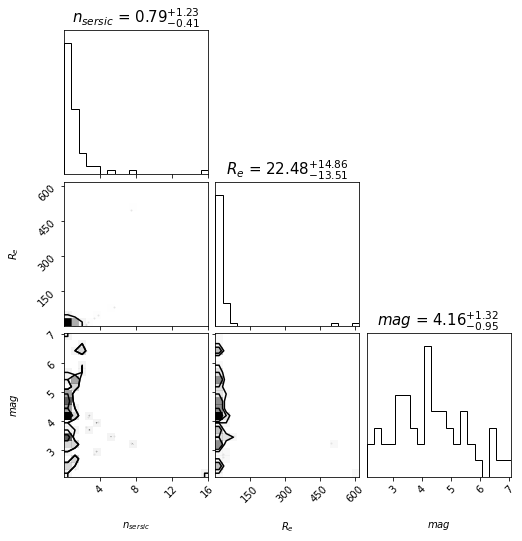

In [5]:
figure = corner.corner(dawtaw.T,labels=[r'$n_{sersic}$', r'$R_e$', r'$mag$'],show_titles=True,
                      title_kwargs={"fontsize":15})

## Finding the "outlier" galaxies that cause the contour plots to effectively line the y-axis.

In [6]:
outlier_array = np.where(dawtaw[1] > 50)
outlier_array[0]

array([17, 27, 28, 42])

In [7]:
print('Outlier R_e values:',dawtaw[1][17],dawtaw[1][27],dawtaw[1][28],dawtaw[1][42])

Outlier R_e values: 620.286 58.7082 498.1177 81.5738


In [18]:
flag = []

for i in range(0,len(dawtaw[1])):

    if dawtaw[1][i] > 50:
        flag.append(False)  
        print(tab['prefix'][i])
    else:
        flag.append(True)
            
print(flag)

VFID1754-NGC4051
VFID3253-NGC4565
VFID3307-NGC4725
VFID4909-MESSIER058
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [27]:
#generating a new corner plot that excludes the R_e outliers

dawtaw2 = np.array([tab['nsersic'][flag],tab['re'][flag],tab['mag'][flag]])

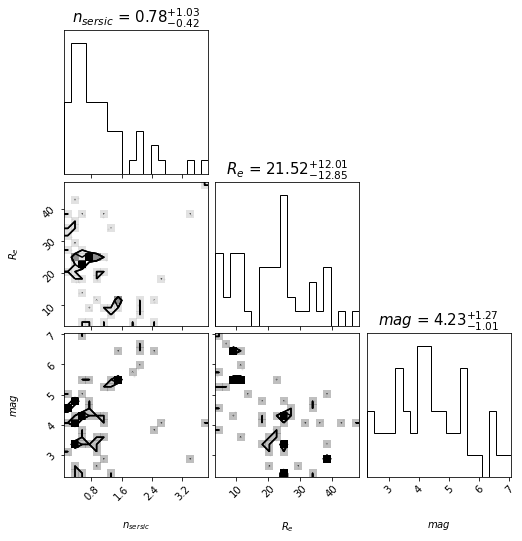

In [28]:
#note: the flag will apply to n_sersic and mag, in addition to R_e. Especially noticeable below is that
#the outlier galfit profiles in R_e appear to represent a few of those for the other variables

figure = corner.corner(dawtaw2.T,labels=[r'$n_{sersic}$', r'$R_e$', r'$mag$'],show_titles=True,
                      title_kwargs={"fontsize":15})

-----------------------

VFID1754-NGC4051
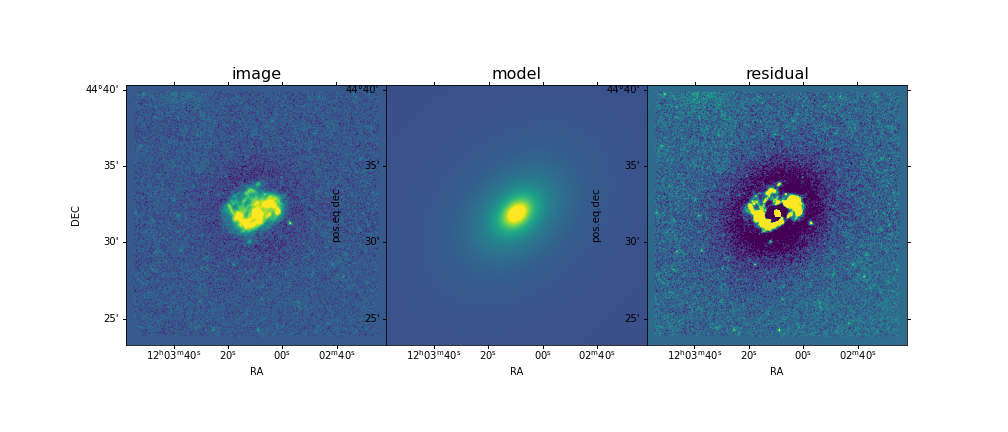

VFID3253-NGC4565

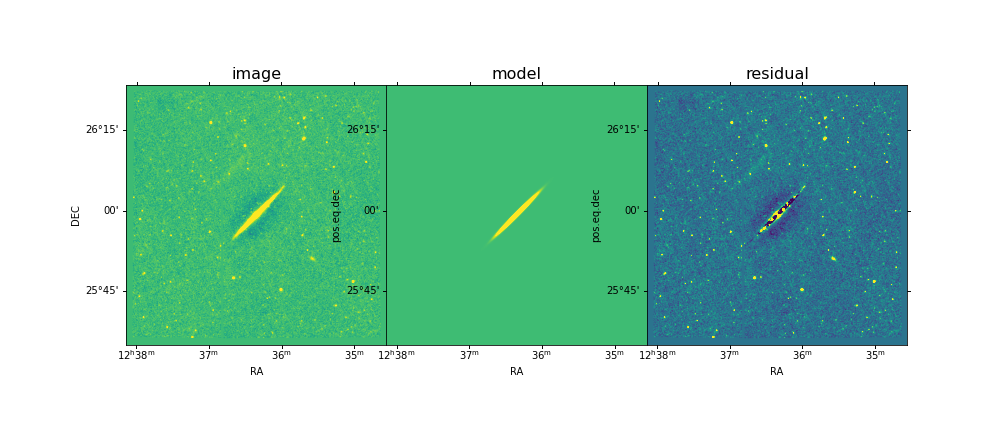

VFID3307-NGC4725

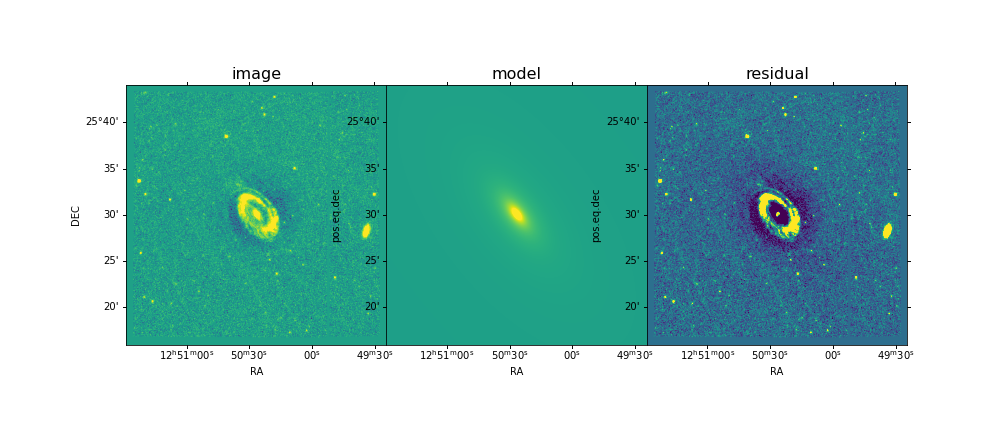

VFID4909-MESSIER058

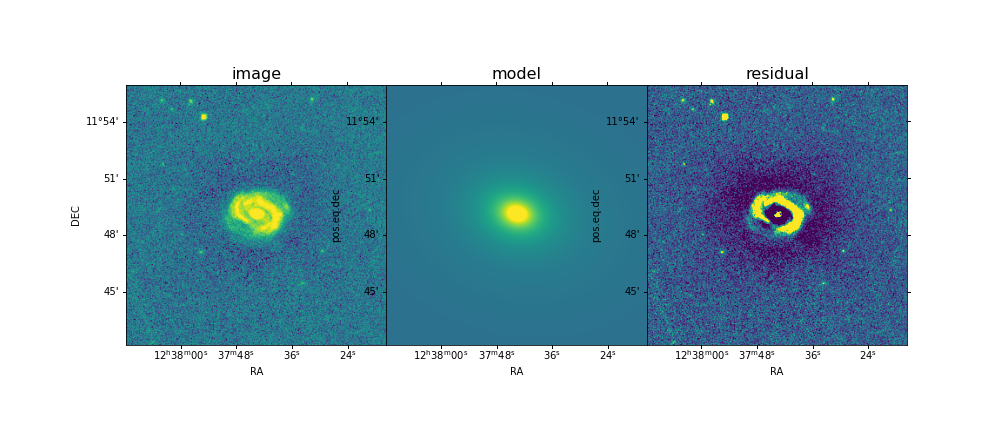

-----------------------

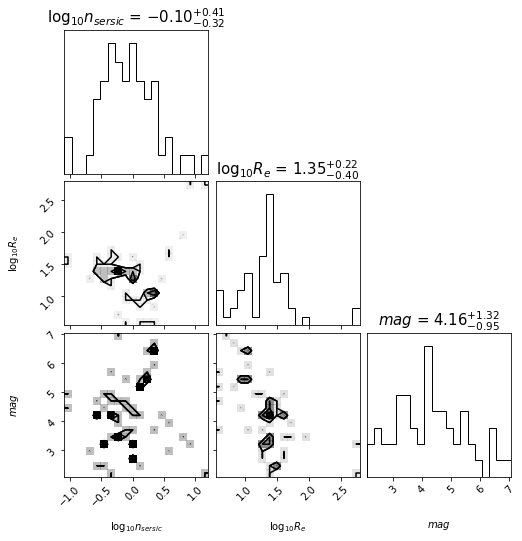

In [34]:
#A second option is to not apply the flag and instead use log10(R_e), per Greg's suggestion...
#I went ahead and did likewise for n_sersic, though I am unsure whether I have committed a contemptible act.

dawtaw3 = np.array([np.log10(tab['nsersic']),np.log10(tab['re']),tab['mag']])
figure = corner.corner(dawtaw3.T,labels=[r'$\log_{10}{n_{sersic}}$', r'$\log_{10}{R_e}$', r'$mag$'],
                       show_titles=True, title_kwargs={"fontsize":15})

In [125]:
xs.T

array([[ 3.845000e-01,  1.723700e+01,  4.849400e+00],
       [ 2.458000e+00,  1.100920e+01,  6.425800e+00],
       [ 1.995400e+00,  7.494400e+00,  6.611100e+00],
       [ 2.016000e+00,  9.972600e+00,  6.545700e+00],
       [ 6.033000e-01,  3.806830e+01,  3.394000e+00],
       [ 7.770000e-01,  8.434900e+00,  5.485100e+00],
       [ 9.567000e-01,  1.773860e+01,  3.303900e+00],
       [ 9.150000e-02,  3.801280e+01,  4.943000e+00],
       [ 2.512000e-01,  3.115930e+01,  4.084900e+00],
       [ 2.976000e-01,  3.673710e+01,  4.129500e+00],
       [ 3.865000e-01,  1.950090e+01,  3.315200e+00],
       [ 5.432000e-01,  2.237030e+01,  3.487700e+00],
       [ 3.117000e-01,  2.248200e+01,  4.325300e+00],
       [ 1.176000e+00,  2.399090e+01,  4.132600e+00],
       [ 6.279000e-01,  2.151980e+01,  3.856200e+00],
       [ 2.689000e-01,  2.723670e+01,  4.628200e+00],
       [ 3.879600e+00,  4.847550e+01,  3.987800e+00],
       [ 1.605260e+01,  6.202860e+02,  2.094500e+00],
       [ 4.710000e-01,  1.70

In [ ]:
#### MEETING NOTES ####

#check objects (DS9? or mosaics) that are OUTLIERS. Are the Galfit models reasonable? Were there failures?
#for "ranges," try creating Boolean flags
#try log(Re)
#sersic index can rise considerably in the presence of an AGN

#codeplots contours, and "points" for outliers
 #not flexible enough for our purposes..?
#plot_contours(bool) arg --> default is one? Try zero?
#range arg.
#label_kwargs

#try finding a proper Pandas tutorial --> share in "coding hints" subchannel of research subchannel
#galapagos...program that measures galfit model uncertainties
#minimum chi squared (maximum likelihood)
#####galfit follows contours...does not jump to properly sample parameter space...quick, but not exhaustive

#sersic profile is a FUNCTION (intensity v. effective radius)
#task is to vary one parameter, keep others constant, observe the result
#(slice through disk --> what willl the intensity be?)
#final task --> a calculus problem! integrate from line...create "annulus" with same brightness as line, etc.